# Minionology: HVSR with seismic nodes
### Skience2023 practical on HVSR, node installation, applications, Geopsy, continuous data analysis

##### Authors:
* Koen Van Noten ([@KoenVanNoten](https://github.com/KoenVanNoten))

##### Introduction:
In Geopsy's H/V module, by default a squared average of the horizontal components is taken. However, the energy of the ambient noise in the frequenc band of interest is not homogeneous and an H/V profile with a directional energy will give a different result. To investigate in which direction the energy (and thus the H/V amplitude is maximal), Geopsy's __H/V rotate module__ can be used. 

In this notebook we'll show how to read Geopsy's _H/V rotate_ .grid output files and to also to add them to an HVSR database so it can be used for mapping/plotting/interpolation, etc.

##### References:
* Van Noten, K., Devleeschouwer, X., Goffin, C., Meyvis, B., Molron, J., Debacker, T.N. & Lecocq, T. 2022. Brussels’ bedrock paleorelief from borehole-controlled powerlaws linking polarised H/V resonance frequencies and sediment thickness. _Journal of Seismology_ 26, 35-55. DOI: https://doi.org/10.1007/s10950-021-10039-8 pdf: https://publi2-as.oma.be/record/5626/files/2022_VanNotenetal_HVSR_Powerlaw_Brussels.pdf 
* Van Noten, K, Lecocq, Buddha Power, B. (2020). HVSR to Virtual Borehole (1.0). Zenodo. https://doi.org/10.5281/zenodo.4276310 and https://github.com/KoenVanNoten/HVSR_to_virtual_borehole/blob/master/HVSR%20polarisation.py

### 1. Use the HV rotate module in Geopsy 
* Load node 453000039.1.2022.12.02.09.20.00.000.*.miniseed HV in HVSR_ex1_Bru in Geopsy
* Use the Geopsy HV rotate module
* Load the BE_00039.log file from HVSR_ex1_Bru/Analysed. Using this log file allows processing the same window as the HV
* Process the data. The default rotation is 10°, but smaller steps can be processed too.
* Save a _BE_00039.hv.grid_ file in __HVSR_ex1_Bru/Analysed__

<img src="Figures/Geopsy HV rotate example.png" width=500></img>

### 2. Making a polar plot from the geopsy HV rotate module output .grid file 
The Geopsy output is not intuitive as polar data are plotted in an __X__ (Frequency) - __Y__ (Azimuth) diagram in stead of a 360° diagram. The script in below loads one or all Geopsy HV rotate module .grid files and replots it into a more understandable polar plot. It will search the azimuth at which the maximum resonance frequency occurs. 

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# run the previous notebook
%run 00_HVSR_Minionology_definitions.ipynb

In below, first several options are given to plot the HV polar plot, then the polar plot is made.
Following data is returned:
* __A_max__: maximum amplitude at resonance frequency deduced from the HVSR polarisation analysis 
* __max_freq__: Resonance frequency at A_max
* __max_Azi__: Azimuth at which resonance frequency is maximum (deduced from polarisation analysis)
* __A_min__: minimum amplitude at resonance frequency deduced from the HVSR polarisation analysis 
* __min_freq__:  Azimuth at which resonance frequency is minimal (deduced from polarisation analysis)
* __min_Azi__: Azimuth at which resonance frequency is minimum (deduced from polarisation analysis)


In [ ]:
plot_polarisation_data?

posx and posy should be finite values
posx and posy should be finite values


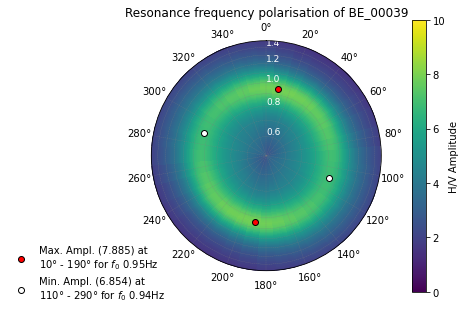

In [39]:
#€ give HV.grid file
HV_file = r'HVSR_ex1_Bru\Analysed\BE_00039.hv.grid'
ID = 'BE_00039'

# If freq_range = True, search for the maximum azimuthal values in a certain frequency range 
# If freq_range = False, code will take the max range in the .grid file
freq_range = False
f_range = [1.15, 1.4]

# Wanna plot the polarisation figure?
plot_fig = True

# Wanna save the polarisation figure?
save_fig = False  # save results to fig (default = png)

# if auto_freq, frequency will be chosen automatically around f0
# if false, give the range of the frequency
auto_freq = False
limfreq_min = 0.5
limfreq_max = 1.49

# spacing of the ticks on the frequency distribution
steps = 0.2

# plot it
A_max, max_freq, max_Azi,A_min, min_freq, min_Azi = plot_polarisation_data(HV_file, ID, limfreq_min, limfreq_max, 10)

Play with the params above.
Analyse the returned data. 
* How "big" is the polarisation ? Compare A_max and A_min.
* Is the min_Azi and max_Azi always perpendicular?

In [38]:
# How "big"
print("A_min is %s %% from A_max"%(round((A_min/ A_max)*100,1)))

# perpendicular?
print(min_Azi - max_Azi, " not perpendicular")

A_min is 81.6 % from A_max
-90  not perpendicular


### 3. Make HV Polarisation plot from all nodes in the HVSR database
First the data is read from the HVSR data (use immediately the HVSR_database_f0_from_HV.csv file made in exercise 1). From either all nodes, or only those given in a list, the polarisation plot will be made, saved and the rotational data will be exported to the HVSR database with the suffix _polarisation_plotted.csv_


In [ ]:
### load the HVSR rom the previous exercise 
database_file = 'HVSR_ex1_Bru/HVSR_database_TouretTaxis_f0_from_hv.csv'
in_folder = 'HVSR_ex1_Bru/Analysed' #Folder containing the Geopsy rotate module files
out_folder = 'Figures' #Folder in which the polarisation figures will be saved

### choose to plot all files from a list or only one specific ID given in below
### if plot_all is True, rotational data will be exported to a "HVSR rotation.csv" file
plot_all = False    #False = manual search
IDs = ['BE_00039', 'BE_00270']  #list of nodes to create the polar plot

# Wanna plot the polarisation figure?
plot_fig = True

# Wanna save the polarisation figure?
save_fig = False  # save results to fig (default = png)

# if auto_freq, frequency will be chosen automatically around f0
# if false, give the range of the frequency
auto_freq = False
limfreq_min = 0.5
limfreq_max = 1.49

# manual = decide to set the maximum of the Amplitude color scale manually (and give the A_amplitude)
# if several plots need to be made, it might be easier to fix the Amplitude so that one can compare the different plots
manual = False
A_manual = 10

# Search for the maximum values in a certain frequency range. Don't use this function when plot_all (or all freqs will be plotted in this range)
freq_range = False
f_range = [1.15, 1.4]

# spacing of the ticks on the frequency distribution
steps = 0.2

################################################
# Main program
################################################

rot_data = []

##### Loop over all data in the HVSR database
if plot_all:
    db_HVSR = pd.read_csv(database_file, delimiter=',', skiprows=0, engine = 'python')
    IDs = db_HVSR["ID"]
    A0s = db_HVSR["A0"]

    for i in IDs:
        HV_file = os.path.join(in_folder, '%s'% i)
        if manual:
            A0_max = A_manual
        else:
            # set maximum amplitude from A0 provided in the database list
            A0_max = round(A0s[(IDs == i).argmax()] + 1, 0)
        try:
            A_max, max_freq, max_Azi,A_min, min_freq, min_Azi = plot_polarisation_data(HV_file, i, limfreq_min, limfreq_max)
        # in newer Geopsy versions the rotation data is saved as .hv.grid extension
        except BaseException as e:
            HV_file = os.path.join(in_folder, '%s.hv.grid' % i)
            A_max, max_freq, max_Azi,A_min, min_freq, min_Azi = plot_polarisation_data(HV_file, i, limfreq_min, limfreq_max)
            pass
    
        #store the data
        rot_data.append([A_max, max_freq, max_Azi,A_min, min_freq, min_Azi])
        print('ID', 'A_max', 'max_freq', 'max_Azi','A_min', 'min_freq', 'min_Azi')
        print(i, round(A_max,2), round(max_freq,2),round(max_Azi,2),round(A_min,2),round(min_freq,2), min_Azi)
        print('   ')

    # Export the polarisation data and add it to the HVSR database
    out_filespec = os.path.splitext(database_file)[0] + "_polarisation.csv"
    outputfile = pd.read_csv(database_file)
    df_polarisation = pd.DataFrame(rot_data, columns = ['A_max', 'max_freq', 'max_Azi','A_min', 'min_freq', 'min_Azi'])
    outputfile = outputfile.join(df_polarisation)
    outputfile.to_csv(out_filespec, index = False)

else:
    IDs = IDs
    db_HVSR = pd.read_csv(database_file, delimiter=',', skiprows=0, engine='python', index_col = "ID")
    A0s = db_HVSR["A0"]
    for i in IDs:
        HV_file = os.path.join(in_folder, '%s.hv.grid'% i)
        print(HV_file)
        if manual:
            A0_max = A_manual
        else:
            # set maximum amplitude from A0 provided in the database list and add 4
            A0_max = np.array(round(A0s[(i)],0)+1)
        # run it
        A_max, max_freq, max_Azi,A_min, min_freq, min_Azi = plot_polarisation_data(HV_file, i, limfreq_min, limfreq_max)

        #store the data
        rot_data.append([A_max, max_freq, max_Azi,A_min, min_freq, min_Azi])
        print('ID', 'A_max', 'max_freq', 'max_Azi','A_min', 'min_freq', 'min_Azi')
        print(i, round(A_max,2), round(max_freq,2),round(max_Azi,2),round(A_min,2),round(min_freq,2), min_Azi)
        print('   ')

        plt.show()

    # Export the polarisation data and add it to the HVSR database
    out_filespec = os.path.splitext(database_file)[0] + "_polarisation.csv"
    outputfile = pd.read_csv(database_file)
    df_polarisation = pd.DataFrame(rot_data,
                                       columns=['A_max', 'max_freq', 'max_Azi', 'A_min', 'min_freq', 'min_Azi'])
    outputfile = outputfile.join(df_polarisation)
    outputfile.to_csv(out_filespec, index=False)


### 4. Auto process the HV polarisation
* call __geopsy.exe__
* call the __-rotate module__ followed by the __miniseed file__
* call the .log file created when doing the HV analysis e.g. __-param HVSR_ex2_Auto\Analysed\BE_00039.log__
* store the generated .hv file in a new folder by __-o HVSR_ex4_Auto\Auto_Analysed__
* Beware! the auto solution does not add a .grid extension to the result


In [33]:
### For Linux users
#!geopsy-hv -hv -param-example HVSR_ex1_Bru\Raw_Data\453000039.1.2022.12.02.09.20.00.000.*.miniseed > geopsy-hv.params

### Windows 10 - give the location where geopsy.exe is stored
### usually in !C:/Users/<USER>/geopsypack-win64-3.4.2/bin/geopsy
!C:/Users/koenvn/geopsypack-win64-3.4.2/bin/geopsy-hv.exe -rotate "HVSR_ex1_Bru\Raw_Data\453000039.1.2022.12.02.09.20.00.000.*.miniseed" -param "HVSR_ex2_Auto\Analysed\BE_00039.log" -o "HVSR_ex4_Rot\Auto_Analysed"

geopsy-hv: Loading C:/OMA/Courses/20230227 SKIENCE/HVSR_ex1_Bru/Raw_Data/453000039.1.2022.12.02.09.20.00.000.E.miniseed...
geopsy-hv: Loading C:/OMA/Courses/20230227 SKIENCE/HVSR_ex1_Bru/Raw_Data/453000039.1.2022.12.02.09.20.00.000.N.miniseed...
geopsy-hv: Loading C:/OMA/Courses/20230227 SKIENCE/HVSR_ex1_Bru/Raw_Data/453000039.1.2022.12.02.09.20.00.000.Z.miniseed...
geopsy-hv: Selected groups:
geopsy-hv: *********** All signals ***********
geopsy-hv: Add signal id 3 to component Vertical of station BE_00039 at 0.00 0.00 0.00
geopsy-hv: Add signal id 2 to component North of station BE_00039 at 0.00 0.00 0.00
geopsy-hv: Add signal id 1 to component East of station BE_00039 at 0.00 0.00 0.00
geopsy-hv:  [PARAM] # Version 0: all files generated with releases before 20170901 (default for input)
geopsy-hv:  [PARAM] PARAMETERS_VERSION=1
geopsy-hv:  [PARAM] # TYPEs:
geopsy-hv:  [PARAM] #   - Signal: from the start or to the end of signal (TEXT are useless)
geopsy-hv:  [PARAM] #   - Delta: a fi

Plot the data

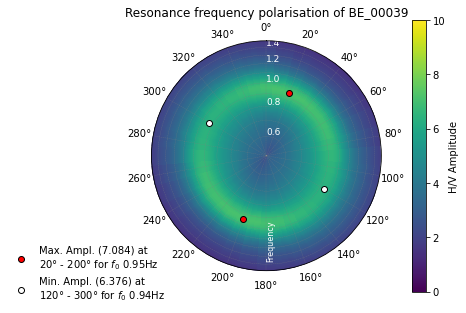

In [40]:
#€ give HV.grid file
HV_file = r'HVSR_ex4_rot\Auto_Analysed\BE_00039.hv'
ID = 'BE_00039'

# If freq_range = True, search for the maximum azimuthal values in a certain frequency range 
# If freq_range = False, code will take the max range in the .grid file
freq_range = False
f_range = [1.15, 1.4]

# Wanna plot the polarisation figure?
plot_fig = True

# Wanna save the polarisation figure?
save_fig = False  # save results to fig (default = png)

# if auto_freq, frequency will be chosen automatically around f0
# if false, give the range of the frequency
auto_freq = False
limfreq_min = 0.5
limfreq_max = 1.49

# spacing of the ticks on the frequency distribution
steps = 0.2

# plot it
A_max, max_freq, max_Azi,A_min, min_freq, min_Azi = plot_polarisation_data(HV_file, ID, limfreq_min, limfreq_max, 10)